In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import better_tensorflow as bt

Prédictions : [1, -1, -1]
Vraies étiquettes : [1, -1, -1]
Accuracy : 1.0

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



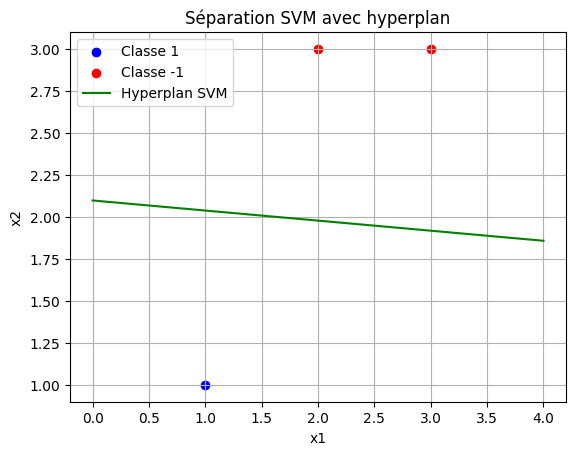

<Figure size 640x480 with 0 Axes>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from better_tensorflow import LinearSVM  # Remplace par le bon module si besoin

# Données d'entraînement
X = np.array([[1, 1], [2, 3], [3, 3]])
Y = np.array([1, -1, -1])

# Initialisation du modèle SVM
svm = LinearSVM(
    lr=0.01,  # learning_rate
    epochs=1000,  # nombre d'itérations
    svm_lambda=0.01,  # paramètre lambda (régularisation)
)

# Entraînement
svm.fit(X.tolist(), Y.tolist())

# Prédictions
Y_pred = svm.predict(X.tolist())

# Évaluation
print("Prédictions :", Y_pred)
print("Vraies étiquettes :", Y.tolist())
print("Accuracy :", accuracy_score(Y, Y_pred))
print("\nClassification Report:\n", classification_report(Y, Y_pred))

# Récupération des poids et du biais
w = svm.get_weights()  # doit retourner [w1, w2]
b = svm.get_bias()  # scalaire

# Tracé des points
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="blue", label="Classe 1")
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color="red", label="Classe -1")

# Tracé de l'hyperplan : w1*x + w2*y + b = 0 => y = -(w1*x + b)/w2
x_vals = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)

# Cas normal
if w[1] != 0:
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, color="green", label="Hyperplan SVM")
else:
    plt.axvline(-b / w[0], color="green", label="Hyperplan vertical")

plt.title("Séparation SVM avec hyperplan")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.show()
plt.clf()

Accuracy: 1.00


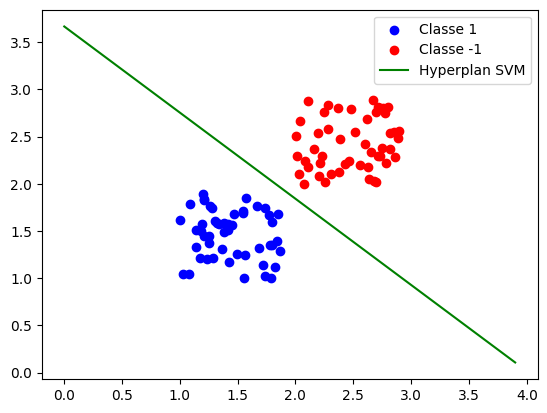

<Figure size 640x480 with 0 Axes>

In [30]:
X = np.concatenate(
    [
        np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
        np.random.random((50, 2)) * 0.9 + np.array([2, 2]),
    ]
)
Y = np.concatenate([np.ones(50), -np.ones(50)])

# Convertir les données en liste de listes pour passer à Rust
X_list = X.tolist()
Y_list = Y.astype(int).tolist()

# Instanciation et entraînement du modèle
svm = LinearSVM(lr=0.01, epochs=100, svm_lambda=0.01)
svm.fit(X_list, Y_list)

# Prédictions
predictions = svm.predict(X_list)

# Calcul précision
accuracy = np.mean(np.array(predictions) == np.array(Y_list))
print(f"Accuracy: {accuracy:.2f}")


w = svm.get_weights()  # par exemple [w1, w2]
b = svm.get_bias()  # biais b

# Affichage des points
plt.scatter(X[0:50, 0], X[0:50, 1], color="blue", label="Classe 1")
plt.scatter(X[50:100, 0], X[50:100, 1], color="red", label="Classe -1")

# Tracer l'hyperplan : w1*x + w2*y + b = 0 => y = -(w1*x + b) / w2
x_vals = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

plt.plot(x_vals, y_vals, color="green", label="Hyperplan SVM")

plt.legend()
plt.show()
plt.clf()

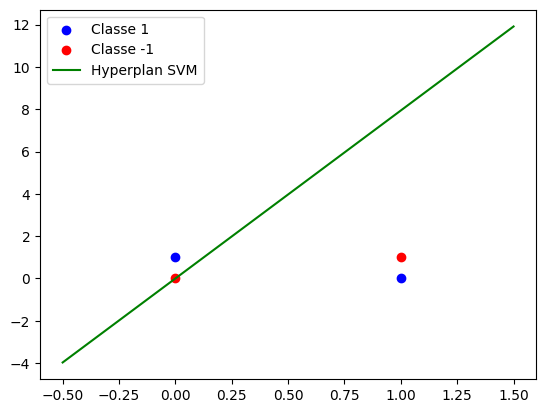

<Figure size 640x480 with 0 Axes>

In [22]:
# Données simples
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

svm = LinearSVM(lr=0.01, epochs=100, svm_lambda=0.01)
svm.fit(X, Y)
w = svm.get_weights()
b = svm.get_bias()

plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="blue", label="Classe 1")
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color="red", label="Classe -1")

# hyperplan : w1*x + w2*y + b = 0 => y = -(w1*x + b) / w2
x_vals = np.linspace(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

plt.plot(x_vals, y_vals, color="green", label="Hyperplan SVM")

plt.legend()
plt.show()
plt.clf()

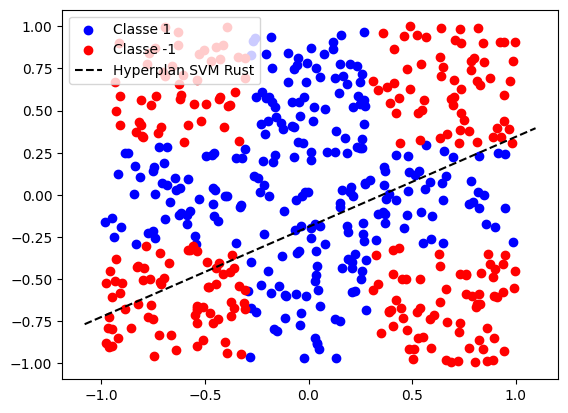

In [37]:
# Génération des données
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

# Conversion des données en listes Python (car Rust attend Vec<Vec<f64>>)
X_list = X.tolist()
Y_list = Y.tolist()

# Initialisation et entraînement du SVM Rust
svm = LinearSVM(lr=0.01, epochs=100, svm_lambda=0.01)
svm.fit(X_list, Y_list)

# Récupération des poids et du biais (weights et bias sont exposés en Rust)
weights = svm.get_weights()  # exemple : [w1, w2]
bias = svm.get_bias()  # float

# Tracé des points
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color="blue", label="Classe 1")
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], color="red", label="Classe -1")

# Tracé de l'hyperplan
x_min, x_max = plt.xlim()
x_vals = np.linspace(x_min, x_max, 200)
# Equation hyperplan: w0*x + w1*y + b = 0 => y = -(w0*x + b)/w1
y_vals = [-(weights[0] * x + bias) / weights[1] for x in x_vals]

plt.plot(x_vals, y_vals, "k--", label="Hyperplan SVM Rust")

plt.legend()
plt.show()